In [2]:
#setup
import numpy as np
import matplotlib.pyplot as plt
import pymatgen.phonon.plotter as ppp
from pymatgen.ext.matproj import MPRester

In [3]:
#import data
me = MPRester("HXCStrOWivVlWhD5FZf")
pBands = me.get_phonon_bandstructure_by_material_id("mp-11520") 

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:455: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib64/python3.6/site-packages/pymatgen/phonon/bandstructure.py:456: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



 Structure des bandes de phonons 


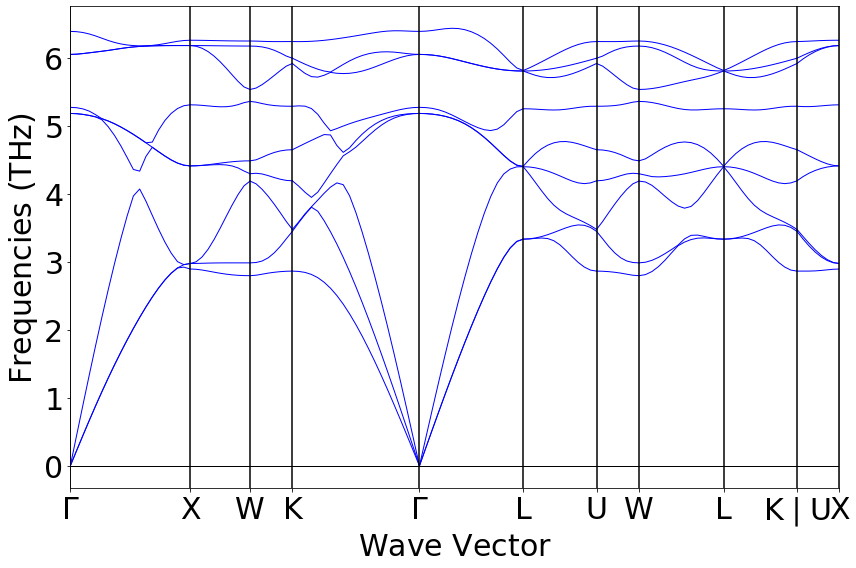

De manière complètement abitraire, étudions :
-> la pemière branche dans la direction W-K
-> la 3e branche dans la direction G-L
-> la 8e branche dans la direction L-K


In [4]:
#plotting the phonon's bandstructure
print('\033[1m', "Structure des bandes de phonons", '\033[0m')
graphe_phonons = ppp.PhononBSPlotter(pBands)
graphe_phonons.show()
print("De manière complètement abitraire, étudions :\n-> la pemière branche dans la direction W-K\n-> la 3e branche dans la direction G-L\n-> la 8e branche dans la direction L-K")

In [5]:
#computing method 
print('\033[1m' , "Méthode de calcul", '\033[0m')
print("\n")
print("On peut calculer la vitesse du son grâce à la formule v = d_omega/dq\n")
print("On va simplifie le calcul en l'estimant par sa pente autour d'un point d'intéret")

 Méthode de calcul 


On peut calculer la vitesse du son grâce à la formule v = d_omega/dq

On va simplifie le calcul en l'estimant par sa pente autour d'un point d'intéret


In [11]:
#computing the sound speed fo the tree cases
print('\033[1m' , "Calcul de la vitesse du son pou les 3 cas proposés", '\033[0m')

#retreiving data
data = graphe_phonons.bs_plot_data()
freq =data.get("frequency")
dist = (data.get("distances")) 

#value of an angtrom
A = 10**(-10)

#computing sound speed
#case 1 : branch 1 - direction W-K
dist_a = dist[2]
branch_a = freq[2][0]
v_a = 2*np.pi*abs(((branch_a[1]*10e12)-(branch_a[0]*10e12))/((dist_a[1]/A)-(dist_a[0]/A))) #in the absolute value operator, a linear estimation of the derivative 
#case 2 : branch 3 - direction G-L
dist_b = dist[4]
branch_b = freq[4][2]
v_b = 2*np.pi*abs(((branch_b[1]*10e12)-(branch_b[0]*10e12))/((dist_b[1]/A)-(dist_b[0]/A))) #in the absolute value operator, a linear estimation of the derivative 
#case 3 : branch 8 - direction L-K
dist_c = dist[8]
branch_c = freq[8][7]
v_c = 2*np.pi*abs(((branch_c[1]*10e12)-(branch_c[0]*10e12))/((dist_c[1]/A)-(dist_c[0]/A))) #in the absolute value operator, a linear estimation of the derivative 
print("Vitesse du son dans la direction W-K dans la première branche : Vs =" ,str(v_a), "[m/s]")
print("Vitesse du son dans la direction G-L dans la troisième branche : Vs =" ,str(v_b), "[m/s]")
print("Vitesse du son dans la direction L-K dans la huitième branche : Vs =" ,str(v_c), "[m/s]")

 Calcul de la vitesse du son pou les 3 cas proposés 
Vitesse du son dans la direction W-K dans la première branche : Vs = 826.4764990569997 [m/s]
Vitesse du son dans la direction G-L dans la troisième branche : Vs = 48666.68861050679 [m/s]
Vitesse du son dans la direction L-K dans la huitième branche : Vs = 190.92049943255188 [m/s]
